In [6]:
#Importing Libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator #used to add labels to image(mask/without)
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
import  numpy as np
import keras
import cv2
import os
import pandas as pd

In [ ]:
!pip install tensorflow-gpu        #installing GPU

     |████████████████████████████████| 454.3MB 38kB/s 


In [ ]:
!nvidia-smi

Fri Jun 25 08:32:24 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img = image.load_img("/content/drive/MyDrive/CI(Assignment)/System/training/with_mask/with_mask_1000.jpg")      #loading an images to check 


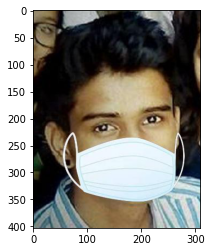

In [ ]:
plt.imshow(img)  #rgb image                  

In [ ]:
cv2.imread("/content/drive/MyDrive/CI(Assignment)/System/training/with_mask/with_mask_1000.jpg" )            
#checks 3d Matrix  128pts high,102pt width and rgb 3 colors

array([[[106, 133, 143],
        [106, 133, 143],
        [106, 134, 145],
        ...,
        [ 37,  33,  38],
        [ 35,  31,  36],
        [ 34,  30,  35]],

       [[106, 133, 143],
        [107, 134, 144],
        [106, 134, 145],
        ...,
        [ 35,  31,  36],
        [ 34,  30,  35],
        [ 33,  29,  34]],

       [[107, 134, 144],
        [107, 134, 144],
        [107, 135, 146],
        ...,
        [ 32,  31,  35],
        [ 30,  29,  33],
        [ 29,  28,  32]],

       ...,

       [[118, 116,  92],
        [135, 135, 111],
        [147, 149, 127],
        ...,
        [181, 168, 124],
        [198, 186, 146],
        [220, 207, 169]],

       [[126, 123, 102],
        [136, 135, 114],
        [147, 146, 126],
        ...,
        [186, 170, 127],
        [198, 182, 140],
        [216, 199, 160]],

       [[136, 133, 112],
        [135, 134, 113],
        [143, 142, 122],
        ...,
        [188, 172, 129],
        [195, 179, 137],
        [208, 191, 152]]

Preprocessing

In [3]:
#train the datasets with imagedatagenerator  convert rgb ranges 0-255 ro 0 and1            (preprocessing)
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)    #divide
test=ImageDataGenerator(rescale=1/255)    #divide


Loading Test, Train and validation datasets

In [7]:
#for training
train_dataset=train .flow_from_directory('/content/drive/MyDrive/CI(Assignment)/System/training',target_size=(200,200),batch_size=32,class_mode='binary')  #target size rezise all images to 200*200px
#batch size represents how many images are given to nn at first,clas mod refers 0 and 1 coz two classes

Found 7553 images belonging to 2 classes.


In [8]:
#for validation

validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/CI(Assignment)/System/validation',target_size=(200,200),batch_size=32,class_mode='binary')  #target size rezise all images to 200*200px
#batch size represents how many images are given to nn at first,clas mod refers 0 and 1 coz two classes

Found 7553 images belonging to 2 classes.


In [7]:
#for testing

test_dataset=test.flow_from_directory('/content/drive/MyDrive/CI(Assignment)/System/testing',target_size=(200,200),batch_size=32,class_mode='binary',shuffle = False)  #target size rezise all images to 200*200pxo 200*200px
#batch size represents how many images are given to nn at first,clas mod refers 0 and 1 coz two classes

Found 200 images belonging to 2 classes.


Display Indices


In [ ]:
train_dataset.class_indices           #this simply classifies with and without mask  0:with mask,1 without mask

{'with_mask': 0, 'without_mask': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Create te CNN Model

In [9]:
model=tf.keras.models.Sequential( #layer 1
                                  [tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),              #16 filter (3,3) size of the filter
                                  tf.keras.layers.MaxPool2D(2,2),                                    #picks the max pixel out of the given no of pixels
                                
                                #layer 2
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                                             tf.keras.layers.MaxPool2D(2,2),
                                 #layer 3
                                tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                                            tf.keras.layers.MaxPool2D(2,2),
                                   
                              
                                   
                                 
                                tf.keras.layers.Flatten(),        #used to connect dense and conv2d layers
                                
                                 tf.keras.layers.Dense(512,activation='relu'),
                                tf.keras.layers.Dense(1,activation='sigmoid')                   #fully connected layers
                                 ])

Compile Model

In [10]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

Train the Model

In [ ]:
model_fit=model.fit(train_dataset,steps_per_epoch=236,epochs=10,validation_data=validation_dataset) #finding accuracy of the model   #,steps_per_epoch=236
#steps per epch define number of times the model should train   #steps epoch =(no of image in train ds/no of batch)

Epoch 1/10
 28/236 [==>...........................] - ETA: 36:11 - loss: 0.8879 - accuracy: 0.6094

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


236/236 [==============================] - 4576s 19s/step - loss: 0.3662 - accuracy: 0.8490 - val_loss: 0.2139 - val_accuracy: 0.9265
Epoch 2/10
236/236 [==============================] - 54s 231ms/step - loss: 0.1987 - accuracy: 0.9245 - val_loss: 0.1577 - val_accuracy: 0.9359
Epoch 3/10
236/236 [==============================] - 54s 230ms/step - loss: 0.1551 - accuracy: 0.9403 - val_loss: 0.0895 - val_accuracy: 0.9661
Epoch 4/10
236/236 [==============================] - 54s 230ms/step - loss: 0.1134 - accuracy: 0.9573 - val_loss: 0.1302 - val_accuracy: 0.9501
Epoch 5/10
236/236 [==============================] - 54s 231ms/step - loss: 0.0850 - accuracy: 0.9690 - val_loss: 0.0508 - val_accuracy: 0.9845
Epoch 6/10
236/236 [==============================] - 54s 231ms/step - loss: 0.0485 - accuracy: 0.9831 - val_loss: 0.0432 - val_accuracy: 0.9856
Epoch 7/10
236/236 [==============================] - 54s 230ms/step - loss: 0.0359 - accuracy: 0.9876 - val_loss: 0.0728 - val_accuracy: 0.9

Save The Model

In [ ]:
model.save("/content/drive/MyDrive/CI(Assignment)/System/bestModel.h5")

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 128)      

Load Saved model and Make Predictions

with mask


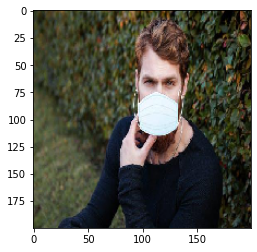

In [8]:
from keras.models import load_model
from keras.applications.resnet50 import preprocess_input
model=load_model("/content/drive/MyDrive/CI(Assignment)/System/bestModel.h5")   #loading a saved model
img_path = '/content/drive/MyDrive/CI(Assignment)/System/testing/with_mask/with_mask_1.jpg'
img = image.load_img(img_path, target_size=(200, 200))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
val= model.predict(x)
if val==0:
    print("with mask")                        #binary ouutput of 0 and 1 from the model
else :
    print("without mask")

Plot the Loss

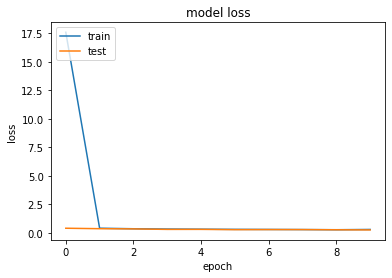

In [ ]:
import matplotlib.pyplot as plt              #for loss
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Plot the accuracy

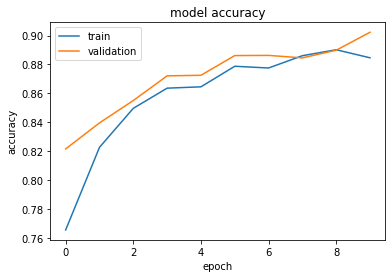

In [ ]:
#plot model accuracy

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Generation Of Classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = model.predict(x=test_dataset)

In [ ]:
predictions1 = np.argmax(predictions, axis = -1)

In [ ]:
print(classification_report(test_dataset.classes,predictions1))

Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_true=test_dataset.classes, y_pred = np.argmax(predictions, axis = -1))

In [ ]:
from itertools import product

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm_plot_labels = ['with_mask','without_mask']
plot_confusion_matrix(cm=cm,classes =cm_plot_labels, title = 'Confusion Matrix')